In [1]:
# Dependencies
# Import own weather api key (Always import never put it in the code for others to see
import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from citipy import citipy

In [2]:
# Cehck a dataframe for latitude and longitude 
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

# Print a few lines to make sure it worked
location_data.head()

,lat_values,lng_values
0,-72.624074,-57.941437
1,-85.918884,-68.196982
2,13.796556,-41.236284
3,-18.110059,-50.428058
4,24.196996,-67.876252


In [3]:
location_data['city'] = ""
location_data['country'] = ""

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_values'], row['lng_values']).city_name
    near_country = citipy.nearest_city(row['lat_values'], row['lng_values']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
    
# Print a few lines to make sure it worked    
location_data.head()

/Users/darceyaltschwager/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/darceyaltschwager/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,lat_values,lng_values,city,country
0,-72.624074,-57.941437,ushuaia,ar
1,-85.918884,-68.196982,ushuaia,ar
2,13.796556,-41.236284,cayenne,gf
3,-18.110059,-50.428058,santa helena de goias,br
4,24.196996,-67.876252,cockburn town,tc


In [4]:
# Need to add in Temperature, Humidity, Cloudiness, Wind Speed, Longitude, and Latitude
location_data['Temp'] = ""
location_data['Humidity'] = ""
location_data['Cloudiness'] = ""
location_data['Wind Speed'] = ""
location_data["Lat"] =""
location_data["Longitude"] =""

# Print a few lines to make sure it worked    
location_data.head()

,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,-72.624074,-57.941437,ushuaia,ar,,,,,,
1,-85.918884,-68.196982,ushuaia,ar,,,,,,
2,13.796556,-41.236284,cayenne,gf,,,,,,
3,-18.110059,-50.428058,santa helena de goias,br,,,,,,
4,24.196996,-67.876252,cockburn town,tc,,,,,,


In [5]:
# Set the sample size.
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

In [6]:
 # Pull the Data!
    
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Lat", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)

http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=ushuaia,ar&units=imperial&APPID=a585c13880587d929d25354cc5528898


/Users/darceyaltschwager/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/darceyaltschwager/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/darceyaltschwager/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/darceyaltschwager/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/darceyaltschwager/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: FutureWarning: set_value is deprecated and will be remo

Retrieved data for ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for cayenne, gf
http://api.openweathermap.org/data/2.5/weather?q=santa helena de goias,br&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for santa helena de goias, br
http://api.openweathermap.org/data/2.5/weather?q=cockburn town,tc&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for cockburn town, tc
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for yellowknife, ca
http://api.openweathermap.org/data/2.5/weather?q=vila velha,br&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for vila velha, br
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for rikitea, pf
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?q=haapu,pf&units=imperial&APPID=a585c13880587d929d25354cc5528898
No data for haapu, pf
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for yellowknife, ca
http://api.openweathermap.org/data/2.5/weather?q=hermanus,za&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for hermanus, za
http://api.openweathermap.org/data/2.5/weather?q=hornslet,dk&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for hornslet, dk
http://api.openweathermap.org/data/2.5/weather?q=dubovka,ru&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for dubovka, ru
http://api.openweathermap.org/data/2.5/weather?q=provideniya,ru&units=imperial&APPID=a585c13880587d929d25354cc5528898
Retrieved data for provideniya, ru
http://api.openweathermap.org/data/2.5/weather?q=harrisonville,us&units=imperial&APPID=a585c13880587d929d25354cc5528898
R

Retrieved data for port alfred, za
http://api.openweathermap.org/data/2.5/weather?q=taolanaro,mg&units=imperial&APPID=a585c13880587d929d25354cc5528898
No data for taolanaro, mg


KeyboardInterrupt: 

In [13]:
# check the total sample size.

len(location_data)

1500

In [14]:
# Save the DataFrame as a csv

location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [15]:
# String Values for plotting

location_data['Lat'] = pd.to_numeric(location_data['Lat'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')

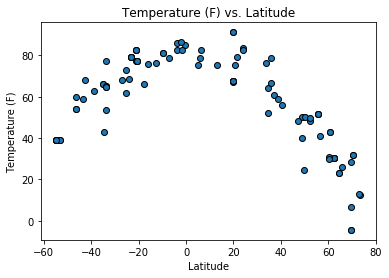

In [16]:
# Plot 1 Temperature Vs. Latitude

x= location_data["Lat"]
y= location_data["Temp"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Temperature (F) vs. Latitude')
plt.ylabel("Temperature (F)")
plt.xlabel('Latitude')
plt.show()

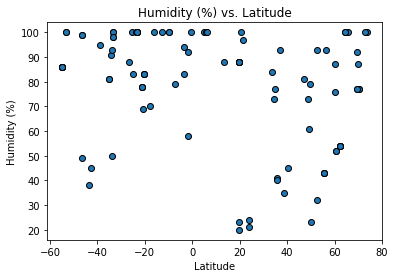

In [17]:
# Plot 2 Humidity (%) vs. Latitude

x= location_data["Lat"]
y= location_data["Humidity"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Humidity (%) vs. Latitude')
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.show()

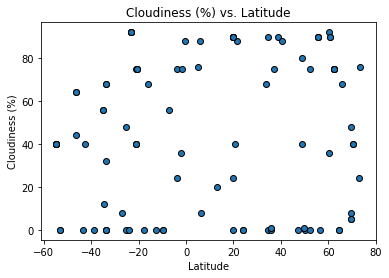

In [18]:
# Plot 3 Cloudiness (%) vs. Latitude

x= location_data["Lat"]
y= location_data["Cloudiness"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.show()

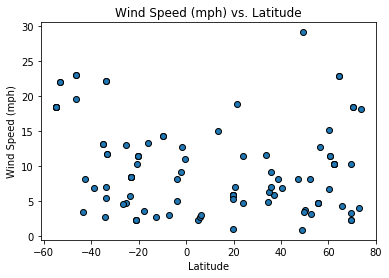

In [12]:
# Plot 4 Wind Speed (mph) vs. Latitude

x= location_data["Lat"]
y= location_data["Wind Speed"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Wind Speed (mph) vs. Latitude')
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.show()